<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/Quiz_2_1_Castillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUIZ 2.1 INTRO TO DEEP LEARNING**

**Castillo, Ronel Christian V.**

CPE 313 CPE32S31

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

df= pd.read_csv('/content/winequality-red.csv')


In [22]:
# Preprocessing
X = df.drop('quality', axis=1)
y = df['quality']
# convert non numerical to numerical
y = (y > 6).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# training
history = model.fit(X_train, y_train, epochs=20, batch_size=42, validation_data=(X_test, y_test))

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8936 - loss: 0.2600 - val_accuracy: 0.8625 - val_loss: 0.2781
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9006 - loss: 0.2706 - val_accuracy: 0.8625 - val_loss: 0.2775
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8997 - loss: 0.2658 - val_accuracy: 0.8594 - val_loss: 0.2774
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9009 - loss: 0.2410 - val_accuracy: 0.8656 - val_loss: 0.2763
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8877 - loss: 0.2845 - val_accuracy: 0.8594 - val_loss: 0.2759
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8772 - loss: 0.2828 - val_accuracy: 0.8594 - val_loss: 0.2770
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8938 - loss: 0.2602 - val_accuracy: 0.8562 - val_loss: 0.2770
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8935 - loss: 0.2507 - val_accuracy: 0.8562 - val_loss

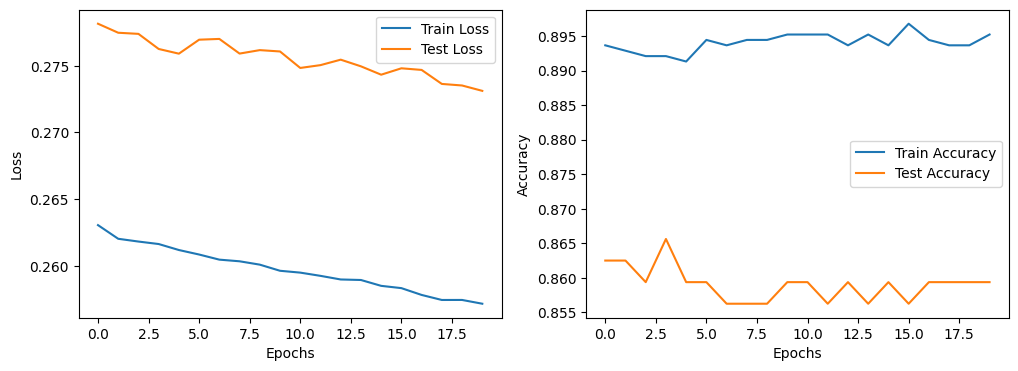

In [25]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# ROC Curve
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


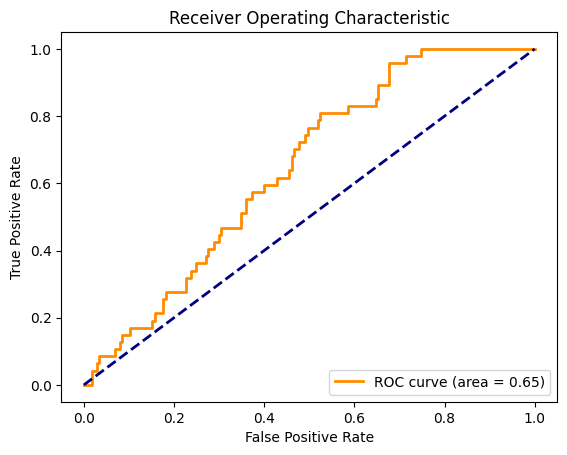

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()